[![GitHub](https://badgen.net/badge/icon/github?icon=github&label)](https://github.com/GuitarsAI/TopicsInAudioAndMusicTech)
<div>
<center>
<img src="https://github.com/GuitarsAI/TopicsInAudioAndMusicTech/blob/main/images/basicRoomAcoustics_header.jpg?raw=1" width="1200" height="400">
</center>
</div>



## Install PyRoomAcoustics

In [ ]:
#@title
%%html
<iframe src="https://pyroomacoustics.readthedocs.io/en/pypi-release/" width="1200" height="1000"></iframe>

In [ ]:
!pip install pyroomacoustics

     |████████████████████████████████| 1.1MB 6.9MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Using cached https://files.pythonhosted.org/packages/8d/43/7339dbabbc2793718d59703aace4166f53c29ee1c202f6ff5bf8a26c4d91/pybind11-2.6.2-py2.py3-none-any.whl
  Created wheel for pyroomacoustics: filename=pyroomacoustics-0.4.3-cp37-cp37m-linux_x86_64.whl size=9594189 sha256=fdc461bd96847e941d033ac0353d99c7e87a9df0c1f70d16386faa9b34a26b0f
  Stored in directory: /root/.cache/pip/wheels/cc/83/09/db35a2af1c11eb86d2e0c0ac2115da8c8f3ff25c79c81e2ada
Successfully built pyroomacoustics


## Import Packages

In [ ]:
import pyroomacoustics as pra
import IPython.display as ipd
import librosa
import librosa.display
import matplotlib.pyplot as plt

## Create a Room


In [ ]:
# Room Dimensions
room_dim=[10,10,10]
room = pra.ShoeBox(room_dim,fs=16000, max_order=10)

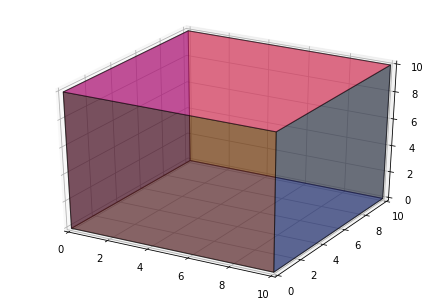

In [ ]:
room.plot();

## Add a Source and a Microphone

In [ ]:
room.add_source([2,5,5]);
room.add_microphone([8,5,5]);

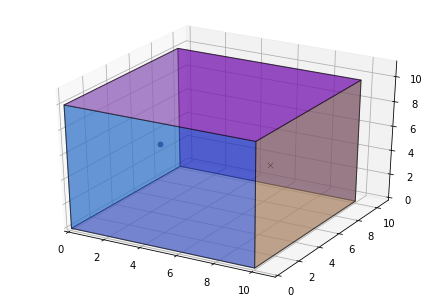

In [ ]:
fig, ax = room.plot(mic_marker_size=30)
ax.set_xlim([0,11])
ax.set_ylim([0,11])
ax.set_zlim([0,11]);

## Compute Image Sources

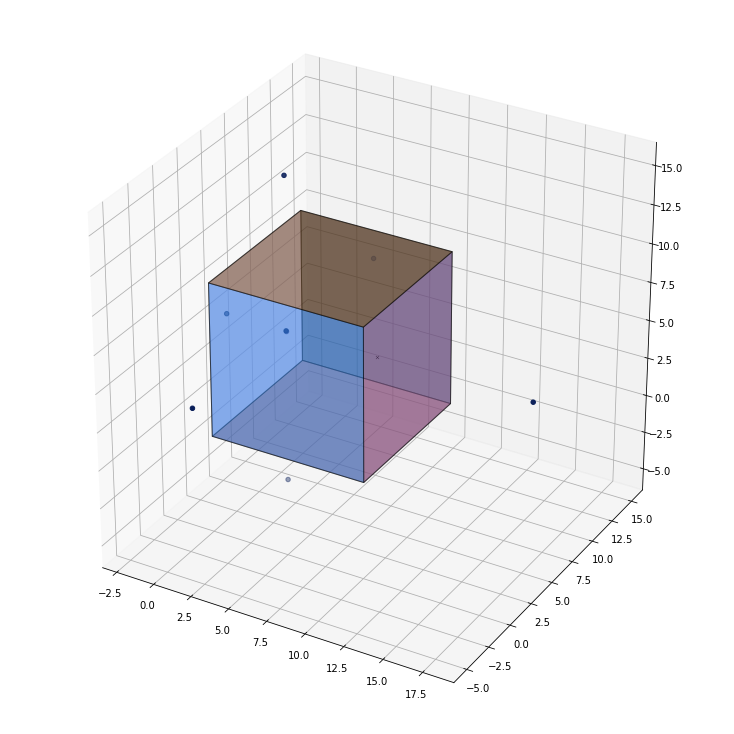

In [ ]:
# compute image sources
room.image_source_model()

# visualize 3D polyhedron room and image sources
fig, ax = room.plot(img_order=1)
fig.set_figwidth(10)
fig.set_figheight(10)


## Compute Room Impulse Response

In [ ]:
room.compute_rir()

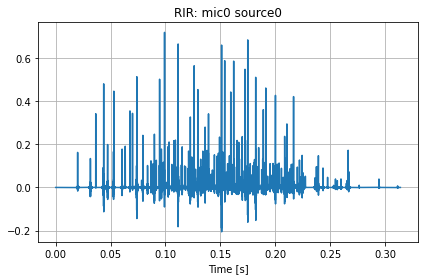

In [ ]:
plt.figure()
room.plot_rir()
plt.grid()

## Compute RT60

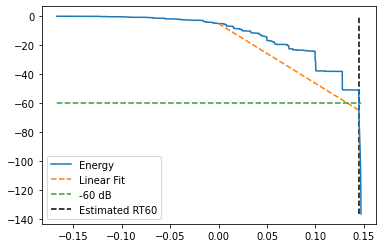

The RT60 is 145 ms


In [ ]:
t60 = pra.experimental.measure_rt60(room.rir[0][0], fs=room.fs, plot=True)
print(f"The RT60 is {t60 * 1000:.0f} ms")

## Load Audio Files

In [ ]:
dataset = pra.datasets.GoogleSpeechCommands(download=True, subset=1, seed=0)

/usr/local/lib/python3.7/dist-packages/pyroomacoustics/datasets/google_speech_commands.py:191: WavFileWarning: Chunk (non-data) not understood, skipping it.
  fs,data = wavfile.read(path)


In [ ]:
print("All sounds in the dataset:")
print(dataset.classes)

All sounds in the dataset:
['three', 'seven', 'happy', 'wow', 'five', 'right', 'bird', 'down', 'on', 'off', 'house', 'eight', 'tree', 'yes', 'stop', 'nine', 'no', 'marvin', 'six', 'sheila', 'four', '_background_noise_', 'up', 'dog', 'zero', 'two', 'left', 'bed', 'go', 'cat', 'one']


In [ ]:
selected_word = 'go'
matches = dataset.filter(word=selected_word)
print("Number of '%s' samples : %d" % (selected_word, len(matches)))

Dataset exists! Using ./google_speech_commands
Number of 'go' samples : 1


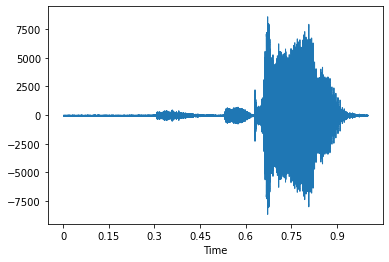

In [ ]:
librosa.display.waveshow(matches[0].data.astype(float),sr=matches[0].fs);

In [ ]:
signal = matches[0].data.astype(float)
fs = matches[0].fs
ipd.Audio(signal,rate=fs)

In [ ]:
room.sources[0].signal=signal

## Simulate Room

In [ ]:
room.simulate()

In [ ]:
# original signal
print("Original:")
ipd.Audio(signal, rate=fs)

Original:


In [ ]:
print("Simulated propagation:")
ipd.Audio(room.mic_array.signals[0,:], rate=fs)

Simulated propagation:
